In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [4]:
df = pd.read_csv('faithful.csv')
df

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
...,...,...,...
267,268,4.117,81
268,269,2.150,46
269,270,4.417,90
270,271,1.817,46


In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.shape

(272, 2)

<AxesSubplot:xlabel='eruptions', ylabel='waiting'>

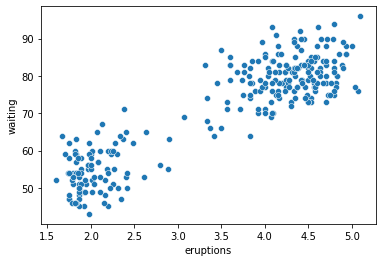

In [7]:
sns.scatterplot(x=df['eruptions'], y=df['waiting'])

In [8]:
N = df.shape[0]
K = 2
r = np.zeros((N, K))
mu = np.zeros((K, 2), dtype=np.float64)

np.random.seed(1000000)
for i in range(0, K):
   j = np.random.randint(0, N)
   mu[i][0] = df.iloc[j][0]
   mu[i][1] = df.iloc[j][1]

In [9]:
def distance(x1, x2):
    return np.sqrt(abs(np.square(np.array(x1) - np.array(x2))).sum())

In [10]:
def Estep(df, mu, r):
    N = df.shape[0]
    K = mu.shape[0]
    for i in range(0, N):
        xi = np.array(df.iloc[i])
        dist = np.zeros(K)
        for j in range(0, K):
            dist[j] = distance(xi, mu[j])
        cluster = np.argmin(dist, axis=0)

        r[i] = np.zeros(K)
        r[i][cluster] = 1
    return r

In [11]:
def Mstep(df, mu, r):
    N = r.shape[0]
    K = r.shape[1]
    for j in range(0, K):
        mu_cnt = 0
        mu_temp = np.zeros(mu.shape[1])
        for i in range(0, N):
            if r[i][j] == 1:
                mu_temp += np.array(df.iloc[i])
                mu_cnt += 1
        mu_temp /= mu_cnt
        mu[j] = mu_temp
    return mu

In [12]:
def Convergence(mu1, mu2):
    K = mu1.shape[0]
    temp = np.zeros(K)
    for i in range(0, K):
        temp[i] = distance(mu1[i], mu2[i])
    return temp.sum()

In [13]:
def AssignClusters(r):
    N = r.shape[0]
    clusters = np.zeros(N)
    for i in range(0, N):
        clusters[i] = np.where(r[i] == 1)[0][0]
    clusters =  clusters.astype(np.int64)
    return clusters

In [14]:
def CostFn(df, mu, r):
    J = 0.0
    N = r.shape[0]
    for i in range(0, N):
        xi = np.array(df.iloc[i])
        clus_i = np.where(r[i] == 1)[0][0]
        dist = distance(xi, mu[clus_i])
        J += dist**2
    return J

Number of iterations: 4


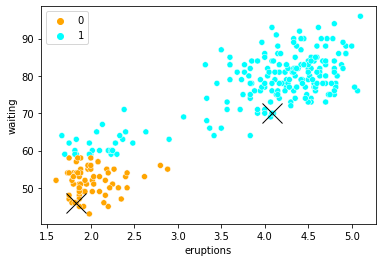

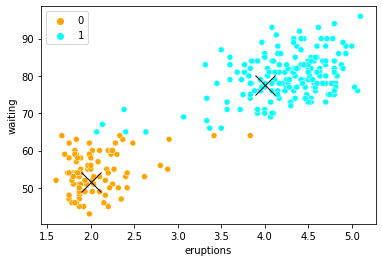

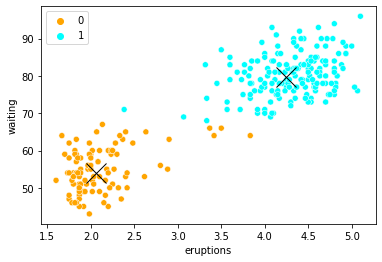

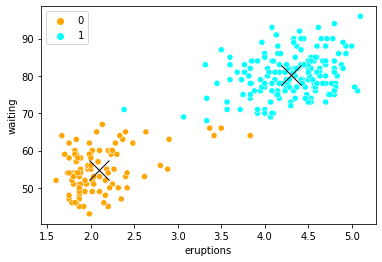

In [15]:
delta = 0.00001
prev_mu = np.zeros((K, 2))
iters = 0
J = []

while Convergence(prev_mu, mu) > delta:
    iters = iters+ 1

    r = Estep(df, mu, r)
    J.append(CostFn(df, mu, r))
    
    clusters = AssignClusters(r)
    prev_mu = copy.deepcopy(mu)
    
    mu = Mstep(df, mu, r)
    J.append(CostFn(df, mu, r))

    plt.figure()
    sns.scatterplot(x=df['eruptions'], y=df['waiting'], hue=clusters, palette=['orange', 'cyan'])
    
    for i in range(0, K):
        plt.plot(prev_mu[i][0], prev_mu[i][1], marker="x", markersize=20, markeredgecolor="black", markerfacecolor="black")

print('Number of iterations: {}'.format(iters))    

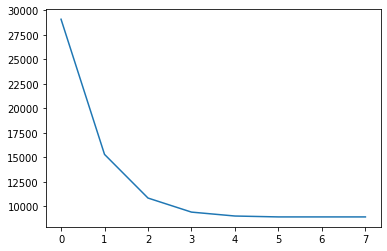

In [16]:
plt.plot(J)